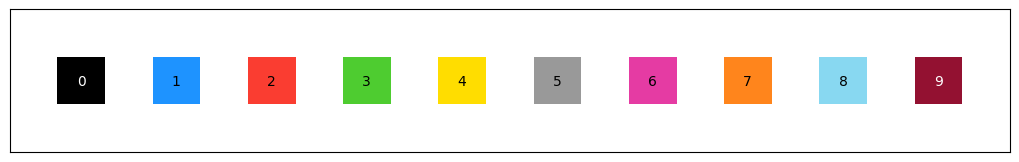

In [1]:
import sys
import json
import shutil
sys.path.append("../inputs/google-code-golf-2025/code_golf_utils")
from code_golf_utils import *
show_legend()

In [2]:
def get_examples(task_num):
    examples = load_examples(task_num)
    show_examples(examples['train'] + examples['test'])
    return examples

def save_file(task_num, sub_dir="/kaggle/working/submission/"):
    task_path = os.path.join(sub_dir, f"task{task_num:03d}.py")
    os.makedirs(sub_dir, exist_ok=True)
    shutil.copy("task.py", task_path)
    
def show_grid(out_grid, in_grid, ans_grid, figsize=(12, 4), k=-0.11):
    # Colors for each index
    colors = [
        (0, 0, 0),
        (30, 147, 255),
        (250, 61, 49),
        (78, 204, 48),
        (255, 221, 0),
        (153, 153, 153),
        (229, 59, 163),
        (255, 133, 28),
        (136, 216, 241),
        (147, 17, 49),
    ]
    colors = [(r/255, g/255, b/255) for r, g, b in colors]

    def plot_ax(ax, arr):
        rows = len(arr)
        cols = len(arr[0])
        # Draw each cell
        for y in range(rows):
            for x in range(cols):
                color = colors[arr[y][x]]
                rect = plt.Rectangle((x, y), 1, 1, facecolor=color, edgecolor="white")
                ax.add_patch(rect)

        # Axis limits
        ax.set_xlim(0, cols)
        ax.set_ylim(0, rows)
        # Center ticks in each cell
        ax.set_xticks([i + 0.5 for i in range(cols)])
        ax.set_yticks([i + 0.5 for i in range(rows)])
        # Label ticks as integers
        ax.set_xticklabels(range(cols))
        ax.set_yticklabels(range(rows))
        ax.tick_params(axis='both', length=0)
        # Move x-axis labels to top
        ax.xaxis.tick_top()
        ax.xaxis.set_label_position('top')
        # Invert y-axis so 0 is at the top
        ax.invert_yaxis()
        # Square cells
        ax.set_aspect('equal')

    fig, ax = plt.subplots(1, 3, figsize=figsize)
    plot_ax(ax[0],out_grid)
    ax[0].set_title("Output",y=k)
    plot_ax(ax[1], in_grid)
    ax[1].set_title("Input",y=k)
    plot_ax(ax[2],ans_grid)
    ax[2].set_title("Answer",y=k)
    plt.show()

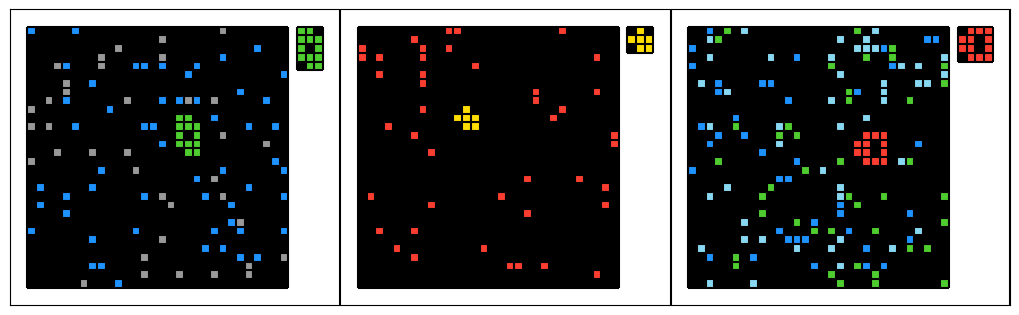

In [3]:
task_num = 36
examples = get_examples(task_num)

In [4]:
def p(g):
    r = [row[:] for row in g]
    
    # 8の長方形の境界を見つける
    min_r = min_c = 10
    max_r = max_c = -1
    
    for i in range(10):
        for j in range(10):
            if g[i][j] == 8:
                min_r = min(min_r, i)
                max_r = max(max_r, i)
                min_c = min(min_c, j)
                max_c = max(max_c, j)
    
    # 端の数字を長方形に投影
    for i in range(10):
        for j in range(10):
            if g[i][j] not in [0, 8]:
                v = g[i][j]
                if i < min_r:  # 上端 → 下向き投影
                    r[min_r][j] = v
                elif i > max_r:  # 下端 → 上向き投影
                    r[max_r][j] = v
                elif j < min_c:  # 左端 → 右向き投影
                    r[i][min_c] = v
                elif j > max_c:  # 右端 → 左向き投影
                    r[i][max_c] = v
    
    return r

In [8]:
def p(g):
 r=[row[:]for row in g]
 a=b=10;c=d=-1
 for i in range(10):
  for j in range(10):
   if g[i][j]==8:a,c,b,d=min(a,i),max(c,i),min(b,j),max(d,j)
 for i in range(10):
  for j in range(10):
   if g[i][j]not in[0,8]:
    v=g[i][j]
    if i<a:r[a][j]=v
    elif i>c:r[c][j]=v
    elif j<b:r[i][b]=v
    elif j>d:r[i][d]=v
 return r

In [9]:
with open("../inputs/google-code-golf-2025/task035.json", "r", encoding="utf-8") as f:
  task_data = json.load(f)

example = task_data["train"][0]
input_grid = example["input"]
expected_output = example["output"]
actual_output = p(input_grid)

is_correct = actual_output == expected_output
status = "✓ 成功" if is_correct else "✗ 失敗"

print(input_grid)
print(expected_output)
print(actual_output)
print(status)

[[0, 0, 0, 0, 9, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 8, 8, 0, 0, 0, 0], [0, 0, 0, 0, 8, 8, 0, 0, 0, 0], [0, 0, 0, 0, 8, 8, 0, 0, 0, 0], [6, 0, 0, 0, 8, 8, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 4, 0, 0, 0, 0]]
[[0, 0, 0, 0, 9, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 9, 8, 0, 0, 0, 0], [0, 0, 0, 0, 8, 8, 0, 0, 0, 0], [0, 0, 0, 0, 8, 8, 0, 0, 0, 0], [6, 0, 0, 0, 6, 4, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 4, 0, 0, 0, 0]]
[[0, 0, 0, 0, 9, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 9, 8, 0, 0, 0, 0], [0, 0, 0, 0, 8, 8, 0, 0, 0, 0], [0, 0, 0, 0, 8, 8, 0, 0, 0, 0], [6, 0, 0, 0, 6, 4, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 4, 0, 0, 0, 0]]
✓ 成功


In [10]:
def test_json():
  with open("../inputs/google-code-golf-2025/task035.json", "r", encoding="utf-8") as f:
    task_data = json.load(f)
  
  train_success = 0
  for i, example in enumerate(task_data["train"]):
      input_grid = example["input"]
      expected_output = example["output"]
      actual_output = p(input_grid)
      
      is_correct = actual_output == expected_output
      status = "✓ 成功" if is_correct else "✗ 失敗"
      
      print(f"Train例{i+1}: {status}")
      if is_correct:
          train_success += 1

  print(f"訓練データの成功率: {train_success}/{len(task_data['train'])}")

  test_success = 0
  for i, example in enumerate(task_data["test"]):
      input_grid = example["input"]
      expected_output = example["output"]
      actual_output = p(input_grid)
      
      is_correct = actual_output == expected_output
      status = "✓ 成功" if is_correct else "✗ 失敗"
      
      print(f"Test例{i+1}: {status}")
      if is_correct:
          test_success += 1

  print(f"テストデータの成功率: {test_success}/{len(task_data['test'])}")

In [11]:
test_json()

Train例1: ✓ 成功
Train例2: ✓ 成功
Train例3: ✓ 成功
訓練データの成功率: 3/3
Test例1: ✓ 成功
テストデータの成功率: 1/1
